# Pandas

## What is Pandas?
A Python library providing data structures and data analysis tools.

## Huh?
Think of it like Excel for Python that doesn't suck.

In [1]:
#By convention import pandas like:
import pandas as pd
#For fake data.
from numpy.random import randn
import numpy as np

# Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [4]:
int_series = pd.Series([i + 10 for i in xrange(10)])
int_series.head(7)

0    10
1    11
2    12
3    13
4    14
5    15
6    16
dtype: int64

In [8]:
num_series = pd.Series(randn(10))
num_series.head()

0   -0.180569
1   -2.791679
2    0.548299
3   -0.155339
4    1.161123
dtype: float64

In [9]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [11]:
fun_series = pd.Series([lambda x: x*i for i in range(10)])
fun_series

0    <function <lambda> at 0x10aa30cf8>
1    <function <lambda> at 0x10aa67668>
2    <function <lambda> at 0x10aa67488>
3    <function <lambda> at 0x10aa676e0>
4    <function <lambda> at 0x10aa67758>
5    <function <lambda> at 0x10aa677d0>
6    <function <lambda> at 0x10aa67848>
7    <function <lambda> at 0x10aa678c0>
8    <function <lambda> at 0x10aa67938>
9    <function <lambda> at 0x10aa679b0>
dtype: object

# Indexes.
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [12]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

California    0.000259
Alabama      -0.303370
Indiana      -0.492151
Montana       0.944631
Kentucky      0.780585
dtype: float64


Washington    1.634667
Alabama      -1.046461
Montana      -0.142955
Indiana       0.407422
New York     -0.042223
dtype: float64


In [13]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama      -1.349830
California         NaN
Indiana      -0.084729
Kentucky           NaN
Montana       0.801677
New York           NaN
Washington         NaN
dtype: float64

In [20]:
indexed_series = pd.Series(randn(5*100), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*100)

#If you have non-unique indexes, you can use them 
#to do groupby operations.

# indexed_series
indexed_series.groupby(level=0).mean()

Alabama       0.009645
California   -0.013155
Indiana      -0.080862
Kentucky     -0.042087
Montana      -0.036061
dtype: float64

In [21]:
indexed_series['Alabama']

Alabama   -0.149723
Alabama    1.614123
Alabama    2.126128
Alabama    0.602461
Alabama    1.326214
Alabama    1.348567
Alabama    1.150699
Alabama   -1.419701
Alabama   -0.861687
Alabama   -1.460732
Alabama    1.159095
Alabama   -0.285822
Alabama   -0.758488
Alabama    0.871491
Alabama   -0.385540
Alabama   -0.596399
Alabama    1.324315
Alabama    0.158434
Alabama   -1.106628
Alabama   -0.133078
Alabama   -0.300011
Alabama    0.420643
Alabama    1.030458
Alabama    0.710441
Alabama    1.030093
Alabama    0.786824
Alabama    1.118410
Alabama    1.947856
Alabama   -0.186550
Alabama   -0.341569
             ...   
Alabama    0.176938
Alabama    0.222018
Alabama    1.366404
Alabama   -0.772393
Alabama    0.311182
Alabama   -0.465768
Alabama   -0.579202
Alabama    0.666047
Alabama    0.007628
Alabama   -0.204245
Alabama    0.469916
Alabama   -0.972548
Alabama    0.554355
Alabama   -0.988082
Alabama   -1.389041
Alabama    2.527709
Alabama    0.774091
Alabama   -1.109784
Alabama    1.748445


In [22]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31   -0.806393
2015-02-28   -1.217313
2015-03-31    0.247658
2015-04-30   -1.577593
2015-05-31    0.400231
2015-06-30    0.028665
2015-07-31   -2.788628
2015-08-31    1.112595
2015-09-30    2.279571
2015-10-31    0.100993
Freq: M, dtype: float64

In [29]:
#Datetime indexes make it easy to transform freqs etc!
dt_series.resample('q').mean()

2015-03-31   -0.592016
2015-06-30   -0.382899
2015-09-30    0.201180
2015-12-31    0.100993
Freq: Q-DEC, dtype: float64

In [30]:
dt_series

2015-01-31   -0.806393
2015-02-28   -1.217313
2015-03-31    0.247658
2015-04-30   -1.577593
2015-05-31    0.400231
2015-06-30    0.028665
2015-07-31   -2.788628
2015-08-31    1.112595
2015-09-30    2.279571
2015-10-31    0.100993
Freq: M, dtype: float64

# DataFrames
Data frames extend the concept of Series to table-like data.

In [31]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,-0.218412,-0.178087,0.054843,-1.092393,0.492776
2015-02-28,-2.111047,-1.358571,1.342461,-0.141034,1.915312
2015-03-31,0.509160,1.274408,-0.144697,-0.627779,0.144554
2015-04-30,-1.127749,0.130294,-2.228916,-0.272287,-2.521556
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475
2015-06-30,-0.204152,-0.951529,-0.813809,0.966478,1.545573
2015-07-31,0.536897,0.127886,0.859988,-0.668712,0.235046
2015-08-31,-0.749025,-0.055542,-1.137550,0.487150,-0.765034
2015-09-30,-0.815057,-0.422420,-0.193805,0.738350,0.066260
2015-10-31,0.544570,-0.298744,1.826473,0.937489,0.441093


In [32]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [38]:
df['a']

,a
2015-01-31,-0.218412
2015-02-28,-2.111047
2015-03-31,0.509160
2015-04-30,-1.127749
2015-05-31,1.248606
2015-06-30,-0.204152
2015-07-31,0.536897
2015-08-31,-0.749025
2015-09-30,-0.815057
2015-10-31,0.544570


In [33]:
#So are the rows.
row = df.ix['2015-01-31']
type(row)

pandas.core.series.Series

In [40]:
# select row by row label
df.loc['2015-01-31']

a   -0.218412
b   -0.178087
c    0.054843
d   -1.092393
e    0.492776
Name: 2015-01-31 00:00:00, dtype: float64

In [46]:
# select row by index
df.iloc[0]

a   -0.218412
b   -0.178087
c    0.054843
d   -1.092393
e    0.492776
Name: 2015-01-31 00:00:00, dtype: float64

In [44]:
# select row by either label OR index
df.ix['2015-01-31']
# df.ix[0]

a   -0.218412
b   -0.178087
c    0.054843
d   -1.092393
e    0.492776
Name: 2015-01-31 00:00:00, dtype: float64

In [48]:
#The columns all have the same index:
col.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [49]:
#What's the index for the rows?
row.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

# DataFrame basics

In [52]:
#New column
df['new'] = df['a'] + df['b']
df['new2'] = 5
df

,a,b,c,d,e,new,new2
2015-01-31,-0.218412,-0.178087,0.054843,-1.092393,0.492776,-0.396499,5
2015-02-28,-2.111047,-1.358571,1.342461,-0.141034,1.915312,-3.469617,5
2015-03-31,0.509160,1.274408,-0.144697,-0.627779,0.144554,1.783568,5
2015-04-30,-1.127749,0.130294,-2.228916,-0.272287,-2.521556,-0.997455,5
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475,0.276381,5
2015-06-30,-0.204152,-0.951529,-0.813809,0.966478,1.545573,-1.155681,5
2015-07-31,0.536897,0.127886,0.859988,-0.668712,0.235046,0.664783,5
2015-08-31,-0.749025,-0.055542,-1.137550,0.487150,-0.765034,-0.804567,5
2015-09-30,-0.815057,-0.422420,-0.193805,0.738350,0.066260,-1.237477,5
2015-10-31,0.544570,-0.298744,1.826473,0.937489,0.441093,0.245826,5


In [53]:
df['a'] + df['b']

2015-01-31   -0.396499
2015-02-28   -3.469617
2015-03-31    1.783568
2015-04-30   -0.997455
2015-05-31    0.276381
2015-06-30   -1.155681
2015-07-31    0.664783
2015-08-31   -0.804567
2015-09-30   -1.237477
2015-10-31    0.245826
Freq: M, dtype: float64

In [58]:
#Delete a column
df = df.drop('new', axis=1)

In [60]:
df

,a,b,c,d,e,new2
2015-01-31,-0.218412,-0.178087,0.054843,-1.092393,0.492776,5
2015-02-28,-2.111047,-1.358571,1.342461,-0.141034,1.915312,5
2015-03-31,0.509160,1.274408,-0.144697,-0.627779,0.144554,5
2015-04-30,-1.127749,0.130294,-2.228916,-0.272287,-2.521556,5
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475,5
2015-06-30,-0.204152,-0.951529,-0.813809,0.966478,1.545573,5
2015-07-31,0.536897,0.127886,0.859988,-0.668712,0.235046,5
2015-08-31,-0.749025,-0.055542,-1.137550,0.487150,-0.765034,5
2015-09-30,-0.815057,-0.422420,-0.193805,0.738350,0.066260,5
2015-10-31,0.544570,-0.298744,1.826473,0.937489,0.441093,5


## Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [61]:
lbl = pd.Timestamp('2015-04-30 00:00:00', freq='M')
df.drop(lbl, axis=0)

,a,b,c,d,e,new2
2015-01-31,-0.218412,-0.178087,0.054843,-1.092393,0.492776,5
2015-02-28,-2.111047,-1.358571,1.342461,-0.141034,1.915312,5
2015-03-31,0.509160,1.274408,-0.144697,-0.627779,0.144554,5
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475,5
2015-06-30,-0.204152,-0.951529,-0.813809,0.966478,1.545573,5
2015-07-31,0.536897,0.127886,0.859988,-0.668712,0.235046,5
2015-08-31,-0.749025,-0.055542,-1.137550,0.487150,-0.765034,5
2015-09-30,-0.815057,-0.422420,-0.193805,0.738350,0.066260,5
2015-10-31,0.544570,-0.298744,1.826473,0.937489,0.441093,5


In [64]:
df

,a,b,c,d,e,new2
2015-01-31,-0.218412,-0.178087,0.054843,-1.092393,0.492776,5
2015-02-28,-2.111047,-1.358571,1.342461,-0.141034,1.915312,5
2015-03-31,0.509160,1.274408,-0.144697,-0.627779,0.144554,5
2015-04-30,-1.127749,0.130294,-2.228916,-0.272287,-2.521556,5
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475,5
2015-06-30,-0.204152,-0.951529,-0.813809,0.966478,1.545573,5
2015-07-31,0.536897,0.127886,0.859988,-0.668712,0.235046,5
2015-08-31,-0.749025,-0.055542,-1.137550,0.487150,-0.765034,5
2015-09-30,-0.815057,-0.422420,-0.193805,0.738350,0.066260,5
2015-10-31,0.544570,-0.298744,1.826473,0.937489,0.441093,5


# Selecting subsets.
There a couple of ways to select a subset of a python data frame.

In [65]:
#To subset the rows, you can use the convenient:
df[df['a'] > 0]

,a,b,c,d,e,new2
2015-03-31,0.509160,1.274408,-0.144697,-0.627779,0.144554,5
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475,5
2015-07-31,0.536897,0.127886,0.859988,-0.668712,0.235046,5
2015-10-31,0.544570,-0.298744,1.826473,0.937489,0.441093,5


In [66]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

,a,b,c,d,e,new2
2015-03-31,0.509160,1.274408,-0.144697,-0.627779,0.144554,5
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475,5


In [67]:
#Selecting a column
df.a
#Works sometimes.

2015-01-31   -0.218412
2015-02-28   -2.111047
2015-03-31    0.509160
2015-04-30   -1.127749
2015-05-31    1.248606
2015-06-30   -0.204152
2015-07-31    0.536897
2015-08-31   -0.749025
2015-09-30   -0.815057
2015-10-31    0.544570
Freq: M, Name: a, dtype: float64

In [68]:
df['a'] #works always

2015-01-31   -0.218412
2015-02-28   -2.111047
2015-03-31    0.509160
2015-04-30   -1.127749
2015-05-31    1.248606
2015-06-30   -0.204152
2015-07-31    0.536897
2015-08-31   -0.749025
2015-09-30   -0.815057
2015-10-31    0.544570
Freq: M, Name: a, dtype: float64

In [69]:
df[['a', 'b']]
#Or a subset of columns

,a,b
2015-01-31,-0.218412,-0.178087
2015-02-28,-2.111047,-1.358571
2015-03-31,0.509160,1.274408
2015-04-30,-1.127749,0.130294
2015-05-31,1.248606,-0.972224
2015-06-30,-0.204152,-0.951529
2015-07-31,0.536897,0.127886
2015-08-31,-0.749025,-0.055542
2015-09-30,-0.815057,-0.422420
2015-10-31,0.544570,-0.298744


# Advanced selection.
The above methods work for simple types of selections, but what if you need something more complex?

In [71]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,-0.311218,0.247401,-0.664475
2015-06-30,-0.813809,0.966478,1.545573
2015-07-31,0.859988,-0.668712,0.235046
2015-08-31,-1.137550,0.487150,-0.765034


In [75]:
df

,a,b,c,d,e,new2
2015-01-31,-0.218412,-0.178087,0.054843,-1.092393,0.492776,5
2015-02-28,-2.111047,-1.358571,1.342461,-0.141034,1.915312,5
2015-03-31,0.509160,1.274408,-0.144697,-0.627779,0.144554,5
2015-04-30,-1.127749,0.130294,-2.228916,-0.272287,-2.521556,5
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475,5
2015-06-30,-0.204152,-0.951529,-0.813809,0.966478,1.545573,5
2015-07-31,0.536897,0.127886,0.859988,-0.668712,0.235046,5
2015-08-31,-0.749025,-0.055542,-1.137550,0.487150,-0.765034,5
2015-09-30,-0.815057,-0.422420,-0.193805,0.738350,0.066260,5
2015-10-31,0.544570,-0.298744,1.826473,0.937489,0.441093,5


In [76]:
df.iloc[2:-3,2:5] #Ranges by number.

,c,d,e
2015-03-31,-0.144697,-0.627779,0.144554
2015-04-30,-2.228916,-0.272287,-2.521556
2015-05-31,-0.311218,0.247401,-0.664475
2015-06-30,-0.813809,0.966478,1.545573
2015-07-31,0.859988,-0.668712,0.235046


In [77]:
#SQL-like queries for parsimonious row selection.
#Experimental
df.query('a > 1 and c <1')

,a,b,c,d,e,new2
2015-05-31,1.248606,-0.972224,-0.311218,0.247401,-0.664475,5


In [78]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)

In [79]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,-0.919334,-1.383597,0.192523,-1.380100,0.791858,Alabama
2015-02-28,0.057079,-0.409658,-1.570921,-0.426461,0.123522,Alaska
2015-03-31,-0.989938,1.346695,1.069703,0.058300,0.060748,Arizona
2015-04-30,-0.808419,-0.559032,-0.982988,-0.274446,-1.993158,Alabama
2015-05-31,-0.642066,-0.426967,0.857912,0.198351,0.529363,Alaska


In [83]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.919334,-1.383597,0.192523,-1.380100,0.791858
Alaska,2015-02-28,0.057079,-0.409658,-1.570921,-0.426461,0.123522
Arizona,2015-03-31,-0.989938,1.346695,1.069703,0.058300,0.060748
Alabama,2015-04-30,-0.808419,-0.559032,-0.982988,-0.274446,-1.993158
Alaska,2015-05-31,-0.642066,-0.426967,0.857912,0.198351,0.529363


In [85]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,-0.919334,-1.383597,0.192523,-1.380100,0.791858
2015-04-30,-0.808419,-0.559032,-0.982988,-0.274446,-1.993158
2015-07-31,0.449599,0.238201,-0.631288,-1.720481,1.131846
2015-10-31,-0.009543,-0.148364,-0.442470,-0.260507,-0.957607
2016-01-31,0.534068,0.403782,-0.645354,0.283447,-1.697415


In [88]:
df.loc['2015-01-31'] #Doesn't work.

KeyError: 'the label [2015-01-31] is not in the [index]'

In [90]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0   -0.919334
1   -1.383597
2    0.192523
3   -1.380100
4    0.791858
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

In [98]:
#Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head()

0                             1                      \
state        Alabama    Alaska   Arizona   Alabama    Alaska   Arizona   
index                                                                    
2015-01-31 -0.919334       NaN       NaN -1.383597       NaN       NaN   
2015-02-28       NaN  0.057079       NaN       NaN -0.409658       NaN   
2015-03-31       NaN       NaN -0.989938       NaN       NaN  1.346695   
2015-04-30 -0.808419       NaN       NaN -0.559032       NaN       NaN   
2015-05-31       NaN -0.642066       NaN       NaN -0.426967       NaN   

                   2                             3                    \
state        Alabama    Alaska   Arizona   Alabama    Alaska Arizona   
index                                                                  
2015-01-31  0.192523       NaN       NaN -1.380100       NaN     NaN   
2015-02-28       NaN -1.570921       NaN       NaN -0.426461     NaN   
2015-03-31       NaN       NaN  1.069703       NaN       NaN  0.0583   
2015-04-30 -0.982988       NaN       NaN -0.274446       NaN     NaN   
2015-05-31       NaN  0.857912       NaN       NaN  0.198351     NaN   

                   4                      
state        Alabama    Alaska   Arizona  
index                                     
2015-01-31  0.791858       NaN       NaN  
2015-02-28       NaN  0.123522       NaN  
2015-03-31       NaN       NaN  0.060748  
2015-04-30 -1.993158       NaN       NaN  
2015-05-31       NaN  0.529363       NaN

In [100]:
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.919334,-1.383597,0.192523,-1.380100,0.791858
Alaska,2015-02-28,0.057079,-0.409658,-1.570921,-0.426461,0.123522
Arizona,2015-03-31,-0.989938,1.346695,1.069703,0.058300,0.060748
Alabama,2015-04-30,-0.808419,-0.559032,-0.982988,-0.274446,-1.993158
Alaska,2015-05-31,-0.642066,-0.426967,0.857912,0.198351,0.529363


# split-apply-combine

In [108]:
df.groupby(level=0).mean()

,0,1,2,3,4
state,,,,,
Alabama,0.246758,-0.101736,-0.137930,-0.576965,-0.265274
Alaska,-0.447685,-0.264967,-0.139876,-0.072223,0.239833
Arizona,-0.351562,0.752285,0.090259,-0.363086,-0.177778


In [110]:
df.groupby(level=1).mean().head() #Groupby index

,0,1,2,3,4
index,,,,,
2015-01-31,-0.919334,-1.383597,0.192523,-1.380100,0.791858
2015-02-28,0.057079,-0.409658,-1.570921,-0.426461,0.123522
2015-03-31,-0.989938,1.346695,1.069703,0.058300,0.060748
2015-04-30,-0.808419,-0.559032,-0.982988,-0.274446,-1.993158
2015-05-31,-0.642066,-0.426967,0.857912,0.198351,0.529363


In [111]:
#Groupby doesn't have to be on index.
df.reset_index().groupby('state').mean().head()
#'state' could be a list of columns to group on.

,0,1,2,3,4
state,,,,,
Alabama,0.246758,-0.101736,-0.137930,-0.576965,-0.265274
Alaska,-0.447685,-0.264967,-0.139876,-0.072223,0.239833
Arizona,-0.351562,0.752285,0.090259,-0.363086,-0.177778


In [116]:
#Apply
g = df.groupby(level=0)

In [120]:
#If one row for each index.
# g.aggregate(np.mean)
g.mean()

,0,1,2,3,4
state,,,,,
Alabama,0.246758,-0.101736,-0.137930,-0.576965,-0.265274
Alaska,-0.447685,-0.264967,-0.139876,-0.072223,0.239833
Arizona,-0.351562,0.752285,0.090259,-0.363086,-0.177778


In [122]:
#If same shape as original:
g.transform(lambda x: (x - x.mean())/x.std()).head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-1.326950,-1.224173,0.320683,-0.782312,0.941702
Alaska,2015-02-28,0.740444,-0.205716,-1.184748,-0.624493,-0.179109
Arizona,2015-03-31,-0.941888,0.649376,0.959817,0.504767,0.294167
Alabama,2015-04-30,-1.200734,-0.436717,-0.820074,0.294675,-1.539214
Alaska,2015-05-31,-0.285139,-0.230324,0.826060,0.477000,0.445852


In [128]:
#Different index than I started with.
g.apply(lambda x: x.describe())

0          1          2          3          4
state                                                               
Alabama count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean    0.246758  -0.101736  -0.137930  -0.576965  -0.265274
        std     0.878776   1.047124   1.030465   1.026618   1.122576
        min    -0.968390  -1.583106  -1.372483  -1.736529  -1.993158
        25%    -0.608700  -0.568329  -0.723565  -1.354127  -1.191267
        50%     0.491833  -0.025803  -0.536879  -0.674528   0.093839
        75%     0.864882   0.330210   0.229484   0.147458   0.642780
        max     1.333029   2.128550   2.095595   1.351130   1.131846
Alaska  count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean   -0.447685  -0.264967  -0.139876  -0.072223   0.239833
        std     0.681706   0.703358   1.207889   0.567241   0.649386
        min    -1.572050  -1.523134  -1.570921  -1.062511  -0.603636
        25%    -0.790815  -0.640880  -1.182629  -0.416661  -0.143724
        50%    -0.338183  -0.380893  -0.252520  -0.202492   0.109577
        75%     0.007461   0.172829   0.685303   0.348839   0.519812
        max     0.618968   1.003100   2.196336   0.734049   1.311548
Arizona count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean   -0.351562   0.752285   0.090259  -0.363086  -0.177778
        std     0.677762   0.915356   1.020449   0.834812   0.810852
        min    -1.137731  -0.800764  -1.239290  -2.013384  -1.765701
        25%    -0.930254   0.445139  -0.571193  -0.634870  -0.549071
        50%    -0.436857   0.633338  -0.147186  -0.234806  -0.125014
        75%     0.095831   1.219665   0.982945   0.197726   0.067441
        max     0.947802   2.412360   1.721852   0.594006   1.443708

In [129]:
df

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.919334,-1.383597,0.192523,-1.380100,0.791858
Alaska,2015-02-28,0.057079,-0.409658,-1.570921,-0.426461,0.123522
Arizona,2015-03-31,-0.989938,1.346695,1.069703,0.058300,0.060748
Alabama,2015-04-30,-0.808419,-0.559032,-0.982988,-0.274446,-1.993158
Alaska,2015-05-31,-0.642066,-0.426967,0.857912,0.198351,0.529363
Arizona,2015-06-30,-0.930582,0.748677,-0.625711,0.594006,-0.208552
Alabama,2015-07-31,0.449599,0.238201,-0.631288,-1.720481,1.131846
Alaska,2015-08-31,-1.572050,-1.523134,-1.289395,-0.450398,0.491159
Arizona,2015-09-30,-0.929270,0.517999,0.722671,0.530052,-0.662577


# Reading and writing data.


In [134]:
df.to_csv('saved_data.csv', sep='\t')

In [135]:
read = pd.read_csv('saved_data.csv', sep='\t')
#TONS OF options for reading data

In [136]:
read

,state,index,0,1,2,3,4
0,Alabama,2015-01-31,-0.919334,-1.383597,0.192523,-1.380100,0.791858
1,Alaska,2015-02-28,0.057079,-0.409658,-1.570921,-0.426461,0.123522
2,Arizona,2015-03-31,-0.989938,1.346695,1.069703,0.058300,0.060748
3,Alabama,2015-04-30,-0.808419,-0.559032,-0.982988,-0.274446,-1.993158
4,Alaska,2015-05-31,-0.642066,-0.426967,0.857912,0.198351,0.529363
5,Arizona,2015-06-30,-0.930582,0.748677,-0.625711,0.594006,-0.208552
6,Alabama,2015-07-31,0.449599,0.238201,-0.631288,-1.720481,1.131846
7,Alaska,2015-08-31,-1.572050,-1.523134,-1.289395,-0.450398,0.491159
8,Arizona,2015-09-30,-0.929270,0.517999,0.722671,0.530052,-0.662577
9,Alabama,2015-10-31,-0.009543,-0.148364,-0.442470,-0.260507,-0.957607


In [ ]:
"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

# Other very useful things.

join, concat and merge

In [146]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alaska', 'Alabama', 'Arizona', 'Arkansas'])
state_df
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
# pd.merge(df.reset_index(), state_df, 
#          left_on='state', right_index=True, how='left').tail()

,governor
Alaska,Robert Bentley
Alabama,Bill Walker
Arizona,Doug Ducey
Arkansas,Asa Hutchinson


In [142]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

,0,1,2,3,4
state,,,,,
Alabama,0.246758,-0.101736,-0.137930,-0.576965,-0.265274
Alaska,-0.447685,-0.264967,-0.139876,-0.072223,0.239833
Arizona,-0.351562,0.752285,0.090259,-0.363086,-0.177778


In [147]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)

,0,1,2,3,4,governor
Alabama,0.246758,-0.101736,-0.137930,-0.576965,-0.265274,Bill Walker
Alaska,-0.447685,-0.264967,-0.139876,-0.072223,0.239833,Robert Bentley
Arizona,-0.351562,0.752285,0.090259,-0.363086,-0.177778,Doug Ducey
Arkansas,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


In [149]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='left')

,0,1,2,3,4,governor
state,,,,,,
Alabama,0.246758,-0.101736,-0.137930,-0.576965,-0.265274,Bill Walker
Alaska,-0.447685,-0.264967,-0.139876,-0.072223,0.239833,Robert Bentley
Arizona,-0.351562,0.752285,0.090259,-0.363086,-0.177778,Doug Ducey


# Exploratory Data Analysis with Pandas

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df

          Date   Outlook  Temperature  Humidity  Windy      Result
0   07-01-2014     sunny           85        85  False  Don't Play
1   07-02-2014     sunny           80        90   True  Don't Play
2   07-03-2014  overcast           83        78  False        Play
3   07-04-2014      rain           70        96  False        Play
4   07-05-2014      rain           68        80  False        Play
5   07-06-2014      rain           65        70   True  Don't Play
6   07-07-2014  overcast           64        65   True        Play
7   07-08-2014     sunny           72        95  False  Don't Play
8   07-09-2014     sunny           69        70  False        Play
9   07-10-2014      rain           75        80  False        Play
10  07-11-2014     sunny           75        70   True        Play
11  07-12-2014  overcast           72        90   True        Play
12  07-13-2014  overcast           81        75  False        Play
13  07-14-2014      rain           71        80   True  Don't 

# Describe the continuous variables

In [163]:
df['Windy'] = df["Windy"].astype('bool')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,14.0,73.571429,6.571667,64.0,69.25,72.0,78.75,85.0
Humidity,14.0,80.285714,9.840486,65.0,71.25,80.0,88.75,96.0


Can see the general pattern of Temperature and Humidity

## We can make use of df.plot() to produce simple graphs that calls on the more adjustable Matplotlib library 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11174d6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111819c50>]], dtype=object)

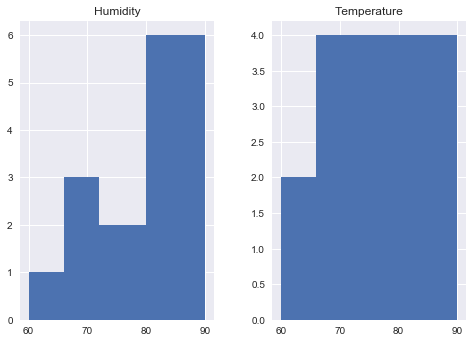

In [172]:
import seaborn as sns
df.hist(['Temperature','Humidity'],bins=[60,66,72,80,90])

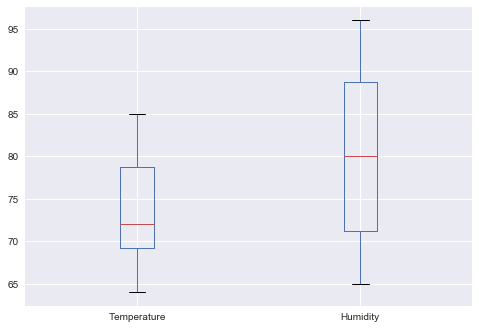

In [173]:
df[['Temperature','Humidity']].plot(kind='box')

### Scatterplots for examining bivariate relationships

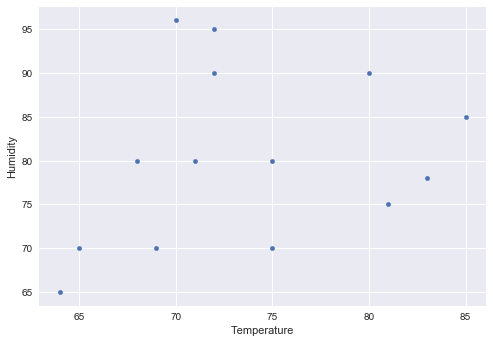

In [175]:
reload(plt)
df.plot('Temperature', 'Humidity', kind='scatter')

### If we want to color the scatterplots according to a category, it requires a bit of matplotlib...ugh!

In [178]:
groups=df.groupby('Outlook')
for name, group in groups:
    print name

overcast
rain
sunny


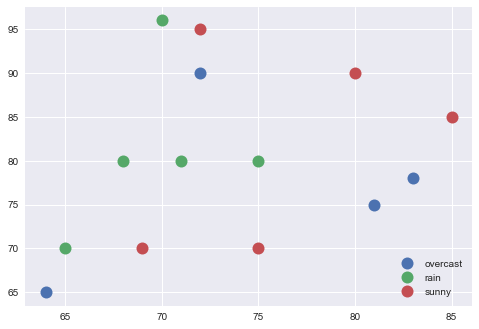

In [180]:
sns.set()
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

# What about the categorical variables? Frequency tables and relative frequency tables

### Simply df.value_counts() gets you the frequencies

In [182]:
df['Outlook'].value_counts()

rain        5
sunny       5
overcast    4
Name: Outlook, dtype: int64

### Using apply will get you the value counts for multiple columns at once

In [184]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5.0
Play,NaN,9.0
overcast,4.0,NaN
rain,5.0,NaN
sunny,5.0,NaN


### Contingency Tables for looking at bivariate relationships between two categorical variables

In [190]:
pd.crosstab(df['Outlook'],df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


### Often we want the row percentages

In [191]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


### Or the column percentages

In [192]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


# Enough...lets get to the pair sprint

https://www.youtube.com/watch?v=yGf6LNWY9AI